In [7]:
from matplotlib import pyplot as plt
import re
import seaborn as sns; sns.set()

In [8]:
all_data = {}

sizes = [56, 110,]

for i in sizes:
    with open(f"MResNet{i}-SD.txt") as f:
        lines = f.read()
    
    data = re.findall(
        r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
        lines,
        re.MULTILINE,
    )
    # print(len(data))
    # print(data)
    epochs = [int(x[0]) for x in data]
    losses = [float(x[1]) for x in data]
    accuracies = [float(x[2]) for x in data]
    test_losses = [float(x[3]) for x in data]
    
    all_data[i]  = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

all_data.keys()

dict_keys([56, 110])

In [9]:
for i in sizes:
    assert len(all_data[i]["epochs"]) == 500

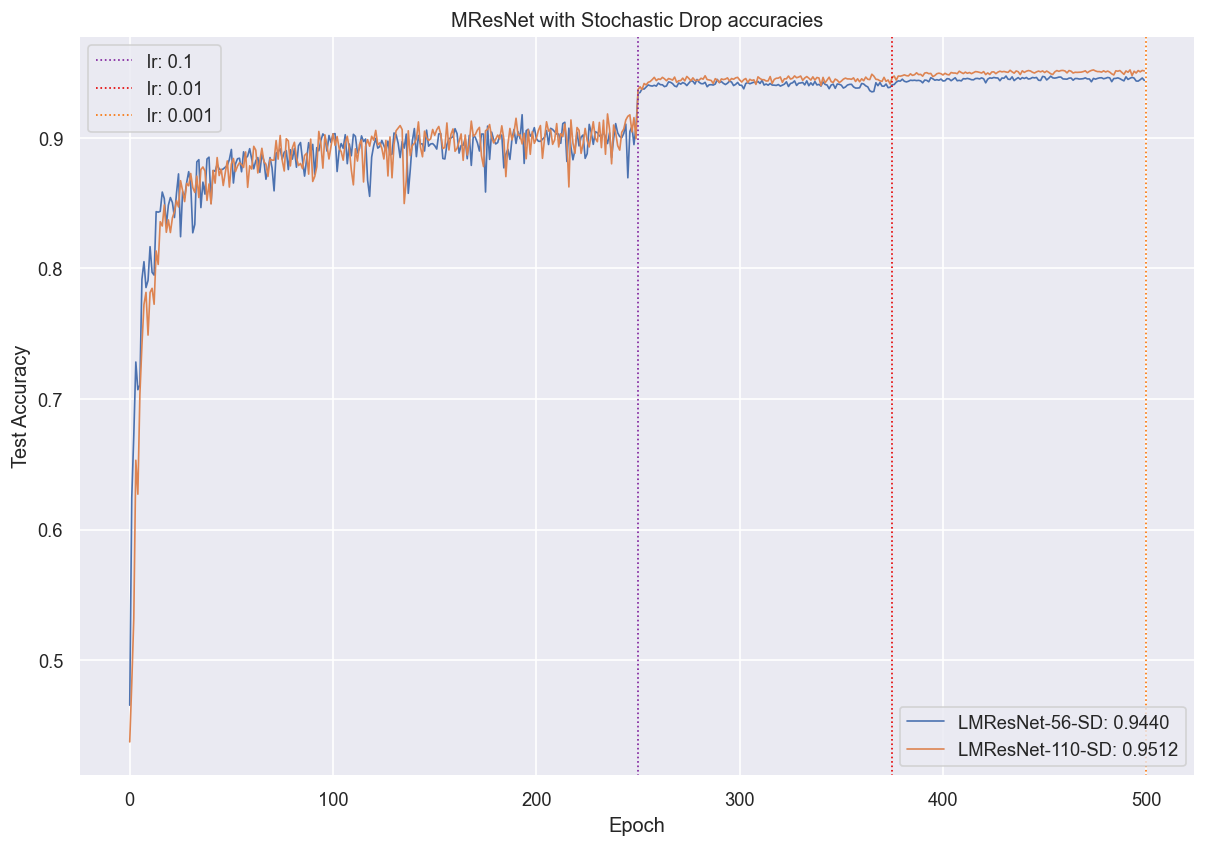

In [10]:
epochs = list(range(1, 500))
lr_dict = {250: 0.1, 375: 0.01, 500: 0.001}

fix, ax = plt.subplots(figsize=(12,8), dpi=120)
handles = []
for i in sizes:
    series = all_data[i]["accuracies"]
    h, = ax.plot(series, label=f"LMResNet-{i}-SD: {series[-1]:.4f}", linewidth=1)
    handles.append(h)

first_legend = plt.legend(handles=handles, loc="lower right")
ax = plt.gca().add_artist(first_legend)

plt.title(f"MResNet with Stochastic Drop accuracies")
#ax.set_ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")

# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

axvhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    axvhs.append(h)

plt.legend(handles=axvhs)
plt.show()

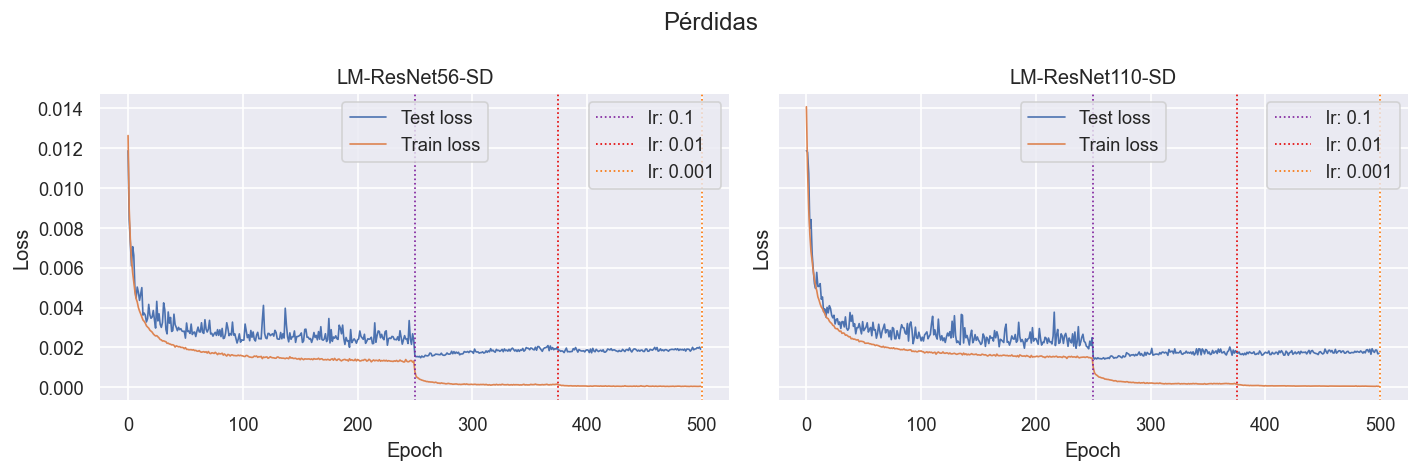

In [11]:
import itertools as it

fix, axes = plt.subplots(figsize=(12,4), dpi=120, nrows=1, ncols=2, sharey=True, sharex=True)
#axes = list(it.chain.from_iterable(axes))

for i, ax in zip(sizes, axes):
    test_l = all_data[i]["test_losses"]
    train_l = all_data[i]["losses"]
    h1, = ax.plot(test_l, label=f"Test loss", linewidth=1)
    h2, = ax.plot(train_l, label=f"Train loss", linewidth=1)
    first_legend = ax.legend(handles=[h1, h2], loc="upper center")
    ax.add_artist(first_legend)

    lrhs = []
    for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
        lr_h = ax.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
        lrhs.append(lr_h)
    
    ax.legend(handles=lrhs, loc="upper right")
    ax.set_title(f"LM-ResNet{i}-SD")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    # ax.set_yscale("log")

plt.suptitle("Pérdidas")
plt.tight_layout()
plt.show()

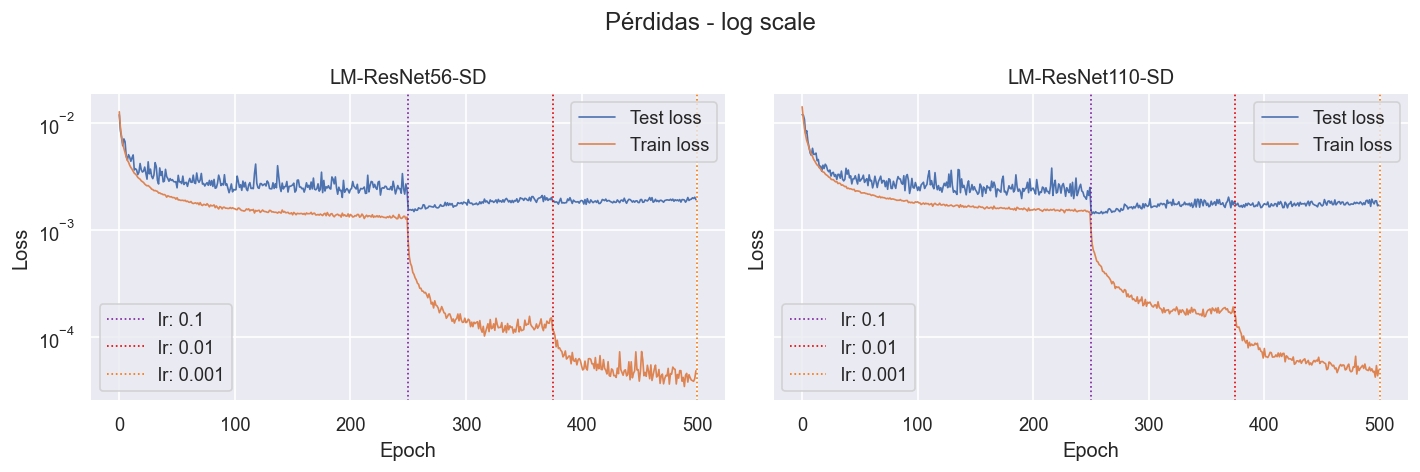

In [12]:
import itertools as it

fix, axes = plt.subplots(figsize=(12,4), dpi=120, nrows=1, ncols=2, sharey=True, sharex=True)
# axes = list(it.chain.from_iterable(axes))

for i, ax in zip(sizes, axes):
    test_l = all_data[i]["test_losses"]
    train_l = all_data[i]["losses"]
    h1, = ax.plot(test_l, label=f"Test loss", linewidth=1)
    h2, = ax.plot(train_l, label=f"Train loss", linewidth=1)
    first_legend = ax.legend(handles=[h1, h2], loc="upper right")
    ax.add_artist(first_legend)

    lrhs = []
    for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
        lr_h = ax.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
        lrhs.append(lr_h)
    
    ax.legend(handles=lrhs, loc="lower left")
    ax.set_title(f"LM-ResNet{i}-SD")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_yscale("log")

plt.suptitle("Pérdidas - log scale")
plt.tight_layout()
plt.show()

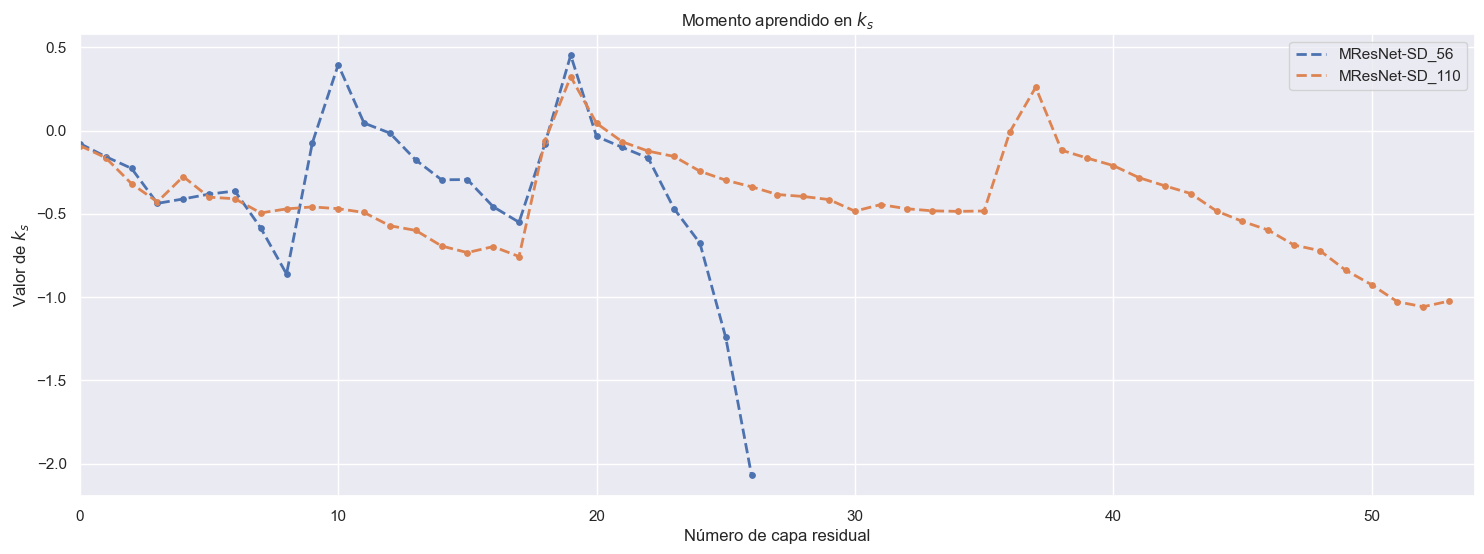

In [13]:
sizes = [56, 110]

kss = {}

for i in sizes:
    with open(f"MResNet{i}-SD_ks.txt") as f:
        _i = {}
        for line in f:
            idx, val = line.split(",")
            _i[int(idx)] = float(val)
        kss[i] = _i

f, ax = plt.subplots(figsize=(18,6))

for resnet_size, values in kss.items():
    assert len(values) == (resnet_size - 2)//2, f"{len(values)=} {(resnet_size-2)//2=}"
    w = ((resnet_size - 2) // 2) - 1
    _y = []
    for k, v in values.items():
        #if k%w ==1:
        #    continue
        _y.append(v)
    _x = list(range(0, len(_y)))
    plt.plot(_x, _y, label=f"MResNet-SD_{resnet_size}", linewidth=2, linestyle="--")
    plt.scatter(_x, _y, s=15)

plt.xlim(0, max(_x)+1)
plt.xlabel("Número de capa residual")
plt.ylabel("Valor de $k_s$")
plt.title("Momento aprendido en $k_s$")
plt.legend()
plt.show()